#                                 Insurance Case Study

In [590]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [591]:
path = "C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Python Foundation Case Study 3 - Insurance Claims Case Study"

In [592]:
claims =pd.read_csv(path+"\claims.csv")

In [593]:
claims.shape

(1100, 10)

In [594]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [595]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [596]:
cust_data = pd.read_csv(path+"\cust_demographics.csv")
cust_data.shape

(1085, 6)

In [597]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


#### 1) Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [598]:
#using left join
df=pd.merge(left=claims,right=cust_data,how="left",left_on="customer_id",right_on="CUST_ID")
df.drop(columns="CUST_ID",inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [599]:
df.shape

(1100, 15)

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.
### 3)Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [601]:
#converting claim_date from object to datetype 
df.claim_date = df.claim_date.apply(lambda X: pd.to_datetime(X,format="%m/%d/%Y"))

In [602]:
#Ans for Q3 
df.claim_amount= df.claim_amount.str.replace("$","")
df.claim_amount=df.claim_amount.astype(float)

<ipython-input-602-c360d74a5b06>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.claim_amount= df.claim_amount.str.replace("$","")


In [603]:
df.DateOfBirth = pd.to_datetime(df.DateOfBirth)

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [520]:
#already converted the claim amount in the data audit step
#df.claim_amount= df.claim_amount.str.replace("$","")
#df.claim_amount=df.claim_amount.astype(float)

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [605]:
df.claim_type.value_counts()

Material only          663
Material and injury    241
Injury only            196
Name: claim_type, dtype: int64

In [606]:
df["report_flag"]= df.police_report.apply(lambda X: 1 if X=="Yes" else 0 if X=="No" else np.nan)
df.drop(columns="police_report",inplace=True)

In [607]:
df.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,report_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0.0
1,33985796,75740424,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,Female,2070-01-13,ME,265-543-1264,Silver,NaN
2,53522022,30308357,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0.0
3,13015401,47830476,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0.0
4,22890252,19269962,Crime,2018-01-13,Auto,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0.0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.  Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [608]:
df.shape

(1100, 15)

In [609]:
df.customer_id.value_counts().index.shape

(1093,)

In [610]:
df.loc[df.customer_id.duplicated(),"customer_id"]

620    84147585
621    85357756
622    53539195
629    30308357
630    47830476
631    19269962
632    21831191
Name: customer_id, dtype: int64

In [611]:
#keeping recent observation and deleting the duplicates
df =df.sort_values(by="claim_date",ascending= False).drop_duplicates(subset=["customer_id"],keep="first")

In [612]:
df.shape

(1093, 15)

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 282 to 1064
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   int64         
 1   customer_id          1093 non-null   int64         
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   object        
 5   claim_type           1093 non-null   object        
 6   claim_amount         1028 non-null   float64       
 7   total_policy_claims  1083 non-null   float64       
 8   fraudulent           1093 non-null   object        
 9   gender               1078 non-null   object        
 10  DateOfBirth          1078 non-null   datetime64[ns]
 11  State                1078 non-null   object        
 12  Contact              1078 non-null   object        
 13  Segment              1078 non-n

In [614]:
df.Contact.head() #not useful so dropping
df.drop(columns='Contact',inplace=True)

In [615]:
df.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
gender                  15
DateOfBirth             15
State                   15
Segment                 15
report_flag            298
dtype: int64

In [532]:
df.Segment.value_counts()

Gold        371
Platinum    361
Silver      346
Name: Segment, dtype: int64

In [533]:
continuous= ["claim_amount"]
categorical=["total_policy_claims","gender","State","Segment","report_flag"]

In [616]:
for i in df.columns:
    if i in continuous:
        df[i].fillna(value=df[i].mean(),inplace=True)
    if i in categorical:
        df[i].fillna(value=df[i].mode()[0],inplace=True)

In [535]:
df.isna().sum()#dateofbirth missing value can be handled as age

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
gender                  0
DateOfBirth            15
State                   0
Segment                 0
report_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
    Children < 18
    Youth 18-30
    Adult 30-60
    Senior > 60

In [619]:
df[df.DateOfBirth.dt.year>2020].shape

(335, 14)

In [620]:
df.DateOfBirth.shape

(1093,)

In [621]:
df.DateOfBirth = np.where(df.DateOfBirth.dt.year > 2000,(df.DateOfBirth-pd.DateOffset(years=100)),df.DateOfBirth)

In [622]:
df[df.DateOfBirth.dt.year>2000].shape


(0, 14)

In [623]:
df["age"] =df.claim_date.dt.year- df.DateOfBirth.dt.year 
print(df.age.max())
print(df.age.min())


58.0
18.0


In [624]:
print(df.age.isna().sum())
df.age.fillna(value =df.age.mean(),inplace=True)
#

15


In [625]:
df.age.isna().sum()

0

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 282 to 1064
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   int64         
 1   customer_id          1093 non-null   int64         
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   object        
 5   claim_type           1093 non-null   object        
 6   claim_amount         1093 non-null   float64       
 7   total_policy_claims  1093 non-null   float64       
 8   fraudulent           1093 non-null   object        
 9   gender               1093 non-null   object        
 10  DateOfBirth          1078 non-null   datetime64[ns]
 11  State                1093 non-null   object        
 12  Segment              1093 non-null   object        
 13  report_flag          1093 non-n

In [627]:
df["cust_cat"] = pd.cut(df.age,bins=[0,17,30,60,100],labels=["Children","Youth","Adult","Senior"])

In [628]:
df["cust_cat"].value_counts()

Adult       744
Youth       349
Children      0
Senior        0
Name: cust_cat, dtype: int64

#### 8. What is the average amount claimed by the customers from various segments?

In [629]:
round(df.groupby("Segment")["claim_amount"].mean(),2).reset_index()

,Segment,claim_amount
0,Gold,12761.66
1,Platinum,12370.57
2,Silver,12265.74


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [630]:
df1 = df[ (df.claim_date < (pd.to_datetime("01-October-2018",format="%d-%B-%Y")+pd.DateOffset(days=-20)))]


In [631]:
df1.claim_date.max()

Timestamp('2018-09-06 00:00:00')

In [632]:
df1.groupby("incident_cause")["claim_amount"].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.269595e+05
1,Driver error,3.344546e+06
2,Natural causes,1.315301e+06
3,Other causes,3.778023e+06
4,Other driver error,3.342803e+06


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [633]:
df.incident_cause.value_counts()

Other causes          289
Driver error          260
Other driver error    247
Natural causes        188
Crime                 109
Name: incident_cause, dtype: int64

In [635]:
df1 = df[df.incident_cause.isin(["Driver error","Other driver error"])& (df.State.isin(["TX","DE","AK"]) & (df.cust_cat=="Adult"))]

In [636]:
pd.crosstab(index=df1.incident_cause,columns=df1.State)

State,AK,DE,TX
incident_cause,,,
Driver error,5,4,3
Other driver error,3,5,3


#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [637]:
a=df.groupby(["gender","Segment"])["claim_amount"].sum()

In [638]:
df.pivot_table(index="Segment",columns="gender",values="claim_amount",aggfunc="sum")

gender,Female,Male
Segment,,
Gold,2.109808e+06,2.816193e+06
Platinum,2.369538e+06,2.096235e+06
Silver,1.897204e+06,2.346741e+06


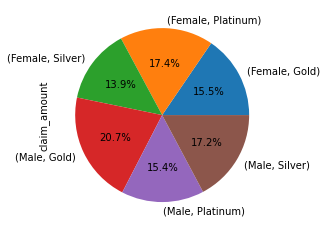

In [639]:
a.plot(kind="pie",autopct='%1.1f%%')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [555]:
driver= df.loc[df.incident_cause.isin(["Driver error","Other driver error"]),["incident_cause","gender"]]

In [640]:
a =driver.groupby("gender").count()
a.rename(columns={"incident_cause":"Number of incidents"},inplace=True)
a

,Number of incidents
gender,
Female,221
Male,286


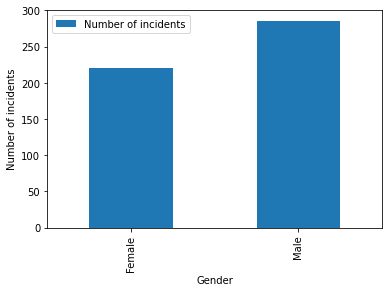

In [641]:
a.plot(kind='bar')
plt.ylabel("Number of incidents")
plt.xlabel("Gender")
plt.legend()
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 282 to 1064
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   int64         
 1   customer_id          1093 non-null   int64         
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   object        
 5   claim_type           1093 non-null   object        
 6   claim_amount         1093 non-null   float64       
 7   total_policy_claims  1093 non-null   float64       
 8   fraudulent           1093 non-null   object        
 9   gender               1093 non-null   object        
 10  DateOfBirth          1078 non-null   datetime64[ns]
 11  State                1093 non-null   object        
 12  Segment              1093 non-null   object        
 13  report_flag          1093 non-n

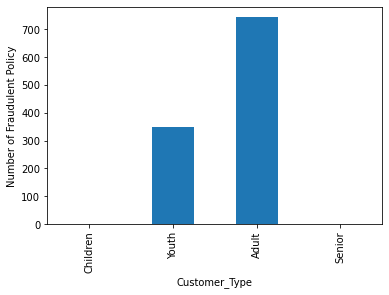

In [643]:
df.groupby("cust_cat").fraudulent.count().plot(kind='bar')
plt.xlabel("Customer_Type")
plt.ylabel("Number of Fraudulent Policy")
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [644]:
df["Claim_Year"] = df.claim_date.dt.year
df["Claim_Month"]=df.claim_date.dt.month
df["month_name"]=df.claim_date.dt.strftime("%B")

In [645]:
a= df.groupby("month_name").claim_amount.sum()
month_list =["January","February","March","April","May","June","July","August","September","October","November","December"]
a[month_list]


month_name
January      1.326987e+06
February     1.188012e+06
March        1.348469e+06
April        1.292461e+06
May          1.115281e+06
June         1.320422e+06
July         1.382770e+06
August       9.135070e+05
September    9.829380e+05
October      1.415650e+06
November     6.259850e+05
December     7.232365e+05
Name: claim_amount, dtype: float64

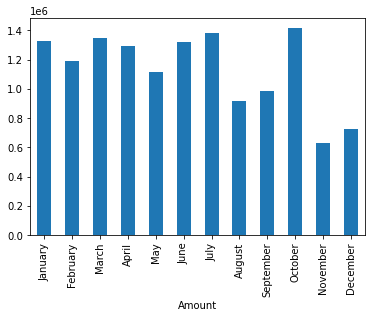

In [646]:
a[month_list].plot(kind="bar")
plt.xlabel("Amount")
plt.show()

In [563]:
#df.pivot_table(index=["month_name"],columns=["Claim_Year"],aggfunc="sum",values="claim_amount").plot(kind="bar")
#plt.show()


### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [564]:
df_fraudulent = df[df["fraudulent"]=="Yes"]
df_notFraudulent = df[df["fraudulent"]=="No"]

In [565]:
df_notFraudulent.pivot_table(index="cust_cat",columns="gender",values="claim_amount",aggfunc="mean")

gender,Female,Male
cust_cat,,
Youth,12448.667865,12291.525324
Adult,12374.516955,12310.428542


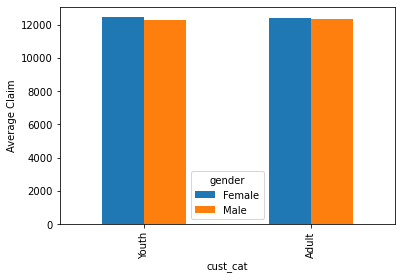

In [647]:
df_notFraudulent.pivot_table(index="cust_cat",columns="gender",values="claim_amount",aggfunc="mean").plot(kind="bar")
plt.ylabel("Average Claim")
plt.show()

In [648]:
df_fraudulent.pivot_table(index="cust_cat",columns="gender",values="claim_amount",aggfunc="mean")

gender,Female,Male
cust_cat,,
Youth,7599.680502,10683.94733
Adult,12564.584237,16309.10672


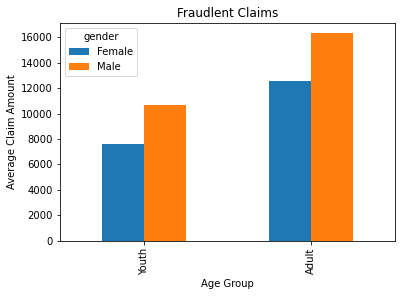

In [649]:
df_fraudulent.pivot_table(index="cust_cat",columns="gender",values="claim_amount",aggfunc="mean").plot(kind="bar")
plt.title("Fraudlent Claims")
plt.xlabel("Age Group")
plt.ylabel("Average Claim Amount")
plt.show()

### 16. Is there any similarity in the amount claimed by males and females?

#### Hypothesis Tesing

    h0: Male claim amount is similar to female claim
    ha: Male claim amount<> female claim

    CI : 95% p value=0.05

    2 continunout variable -> T test



In [650]:
df.gender.value_counts()

Male      566
Female    527
Name: gender, dtype: int64

In [651]:
male_claim=df.loc[df.gender=="Male","claim_amount"]
female_claim = df.loc[df.gender=="Female","claim_amount"]

In [652]:
stats.ttest_ind(male_claim,female_claim,equal_var=False)

Ttest_indResult(statistic=0.898694241573704, pvalue=0.3690141881858279)

### p value is greater than 0.05 so We fail to reject null hypothesis

### BC: Male and female claims are similar

## 17. Is there any relationship between age category and segment?


### Hypothesis Testing

Age category and Segement -> 2 categorical Variable -> Chi square test

    h0:No relationship
    h1:Related to each other



In [654]:
df.cust_cat.value_counts()

Adult       744
Youth       349
Children      0
Senior        0
Name: cust_cat, dtype: int64

In [655]:
obs_freq =pd.crosstab(index = df.cust_cat,columns= df.Segment)
obs_freq

Segment,Gold,Platinum,Silver
cust_cat,,,
Youth,117,123,109
Adult,269,238,237


In [656]:
stats.chi2_contingency( obs_freq )

(1.2566858651757313,
 0.5334750731429394,
 2,
 array([[123.2516011 , 115.26898445, 110.47941446],
        [262.7483989 , 245.73101555, 235.52058554]]))

#### We fail to reject null hypothesis
#### No relationship between Age Category and Segments

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [657]:
#taking current year as 2018
df[df["Claim_Year"]==2018].shape

(492, 19)

In [658]:
df[df["Claim_Year"]==2017].shape

(601, 19)

In [659]:
df["Claim_Year"].max()

2018

#### Hypothesis Testing

        h0: Average Claim amount in current year(2018) <= $10,000
        h1: Average claim amount in 2018 > $10,000
        CI =95% P-Value = 0.05
        One Sample T test

In [660]:
year_2018=df[df["Claim_Year"]==2018]["claim_amount"]

In [661]:
stats.ttest_1samp(year_2018,10000)

Ttest_1sampResult(statistic=4.4147704931665, pvalue=1.2444078618606088e-05)

##### p value is > 0.05 we fail to reject null hypothesis 
#### Average Claim Amount in 2018> 10,000

## 19. Is there any difference between age groups and insurance claims?

In [662]:
df.info()#taking claim amount

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 282 to 1064
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1093 non-null   int64         
 1   customer_id          1093 non-null   int64         
 2   incident_cause       1093 non-null   object        
 3   claim_date           1093 non-null   datetime64[ns]
 4   claim_area           1093 non-null   object        
 5   claim_type           1093 non-null   object        
 6   claim_amount         1093 non-null   float64       
 7   total_policy_claims  1093 non-null   float64       
 8   fraudulent           1093 non-null   object        
 9   gender               1093 non-null   object        
 10  DateOfBirth          1078 non-null   datetime64[ns]
 11  State                1093 non-null   object        
 12  Segment              1093 non-null   object        
 13  report_flag          1093 non-n

In [663]:
df.cust_cat.value_counts()#only 2 categories

Adult       744
Youth       349
Children      0
Senior        0
Name: cust_cat, dtype: int64

In [664]:
adult= df.loc[df["cust_cat"]=="Adult","claim_amount"]
youth = df.loc[df["cust_cat"]=="Youth","claim_amount"]


#### HYPOTHESIS TESTING
    H0: AGE group and Claims are not related
    H1: Age group and claims are related
    CI: 95% p value=0.05
    

In [666]:
stats.ttest_ind(adult,youth)


Ttest_indResult(statistic=1.3254162393330977, pvalue=0.1853106125835954)

#### pvalue>0.05 ->  we fail to reject null hypothesis ---- Age group and Claims are different

### 20. Is there any relationship between total number of policy claims and the claimed amount?

    ho: No relatiionship between total number policy claims and claimed amount
    h1: Total number of policy claims and claimed amount are related
    CI : 95% Pvalue=0.05

In [670]:
list(df.total_policy_claims.value_counts().index)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [676]:
df_policy = dict()
for i in list(df.total_policy_claims.value_counts().index):
    df_policy[i] = df.loc[df["total_policy_claims"]==i,"claim_amount"] 


In [677]:
stats.f_oneway(df_policy[1],df_policy[2],df_policy[3],df_policy[4],df_policy[5],df_policy[6],df_policy[7],df_policy[8])

F_onewayResult(statistic=0.885445718575065, pvalue=0.517207400989369)

#### pvalue >0.05
#### we fail to reject null hypothesis
### BC: No relationship between Number of Policy claims and claimed amount